# 1. Setup and loading data

## 1.1 Installing packages

In [1]:
!pip install tensorflow

In [2]:
!pip list

Package                           Version
--------------------------------- ------------
absl-py                           2.1.0
aiobotocore                       2.7.0
aiohttp                           3.9.3
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.12
altair                            5.0.1
anaconda-anon-usage               0.4.3
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.1.4
anaconda-navigator                2.5.2
anaconda-project                  0.11.1
anyio                             4.2.0
appdirs                           1.4.4
applaunchservices                 0.3.0
appnope                           0.1.2
appscript                         1.1.2
archspec                          0.2.1
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
arrow                             1.2.3
astroid                   

In [3]:
!pip install opencv-python

In [4]:
import tensorflow as tf
import os
import cv2
import imghdr
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ReduceLROnPlateau

/var/folders/ql/ylx4k_vj33g3xpn61rljmvbm0000gn/T/ipykernel_62349/759759948.py:4: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


## 1.2 Loading data

In [5]:
# loading data
data = '/Users/lisellaare/Desktop/Computer vision/google images' 

In [6]:
# removing macOS operatign system file  
!cd /Users/lisellaare/Desktop/Computer\ vision/google\ images && find . -name ".DS_Store" -type f -delete

In [7]:
# list of filenames in the data directory
os.listdir(data)

['hand', 'head', 'leg']

In [8]:
# for inspection purposes
# list of filenames in the leg subdirectory
os.listdir(os.path.join(data, 'leg'))

['broken_ankle_child-1024x681.jpg',
 'LegInjuriesandDisorders_share.jpg',
 'casestudy-770x460-leg.png',
 'leg-injury.jpg',
 'child-cerebral-palsy-leg-brace.jpg',
 'stock-photo-minor-leg-injuries-672998212.jpg',
 '177402803_cast-and-crutches_blog-1030x0-c-center.jpg',
 'ment-Pilates-Bodyworks-Body-Works-Rehabilitation-Rehab-Sportsmassage-Massage.jpg',
 'What-to-Do-if-Your-Child-Is-Injured-at-School.jpg',
 'hood-development.-hands-closeup-of-adult-applying-bandage-to-kid-fit_400_400.jpg',
 'leg-and-foot-injury-treatment-in-jharkhand.jpg',
 'child-accident-disease-claims.jpg',
 '1e2ba9f4-fda2-4163-bdd4-56205359382e.9db7d59b1759b9ba89641b126dd8e0b2.jpeg',
 'crutches_small-768x768-1.png',
 'jured-during-summer-bandaged-for-health-and-pain-relief-photo-image_35613072.jpg',
 '2398463.jpg',
 'Daycare_Injury_Lawyer_CR.jpg',
 'leg-foot-injury.jpg',
 'oot-on-a-swing-traumatic-equipment-child-injury-bruise-sprain-fracture-photo2.jpg',
 'bigstock-Pediatrician-94000460.jpg',
 'injury-child-twisted-l

## 1.3 Removing unwanted images

In [9]:
# defining the acceptable image endings
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [10]:
# for inspection purposes
# iterating through the dataset
for image_class in os.listdir(data): 
     for image in os.listdir(os.path.join(data, image_class)):
         print(image)

work-injury-1.jpg
stock-photo-injury-to-a-child-by-the-hand-bandaged-536380882.jpg
Treating-Hand-Injuries-with-Orthopedics.jpeg
shutterstock_276801020.jpeg
ISHN0217_F4_pic.jpg
First-aid-for-hand-injuries-A-beginners-guide-image.jpg
pngtree-broken-finger-injury-child-people-photo-image_1027397.jpg
hand-injury-1.jpg
360_F_21149466_nPv5azqMBq5x6IfsGSGCvdfCDiglwl3a.jpg
Compilation-of-severe-hand-injuries-initial-trauma-and-results-Example-of-a-severe.jpg
Treating-and-Preventing-Mouth-Injuries-in-Children-722x406.jpg
7-helpfultips-for-recovering-from-hand-injuries.jpg
towfiqu-barbhuiya-YgONpSF3Q28-unsplash-1-scaled.jpg
single-hands-scaled-1.jpg
Childhood.png
379169131.jpg
1308JEMS_splint2.jpg
ligament-injuries-in-the-fingers1.jpg
fig1.jpg
arm-wrist-hand-injuries.jpg
hand-pain.jpg
child-2737062_1280.jpg
Wet-boy-with-cast.jpg
hand-injury-xray-pain.jpg
1000_F_368896238_sNEAgCIrS7hDnIVlCHf8DL9DBoZq9pls.jpg
F7.large.jpg
physiotherapy-for-hand-and-wrist-injuries-in-toronto.jpg
Finger-injury.jpg
3

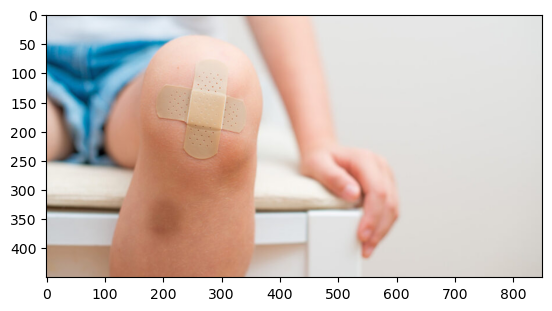

In [11]:
# for inspection purposes
# displaying an image from the leg subdirectory
img = cv2.imread(os.path.join('/Users/lisellaare/Desktop/Computer vision/google images', 'leg', 'bruise-web.jpg'))
img.shape
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [12]:
# iterating through directories to filter out images based on their file extensions
# checking if the image file extension is in the list, if not removes the file
for image_class in os.listdir(data): 
    for image in os.listdir(os.path.join(data, image_class)):
        image_path = os.path.join(data, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            os.remove(image_path)

## 1.4 Building the data pipeline

In [13]:
# building the pipeline
dt = tf.keras.utils.image_dataset_from_directory('/Users/lisellaare/Desktop/Computer vision/google images')

Found 338 files belonging to 3 classes.


In [14]:
# access the data pipeline
dt_iterator = dt.as_numpy_iterator()

In [15]:
# access a batch of images 
batch = dt_iterator.next()

In [16]:
# images as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [17]:
# image labels
batch[1]

array([0, 2, 1, 0, 2, 0, 0, 2, 0, 1, 0, 0, 2, 2, 0, 2, 0, 2, 1, 1, 2, 1,
       2, 0, 2, 2, 0, 0, 2, 1, 1, 2], dtype=int32)

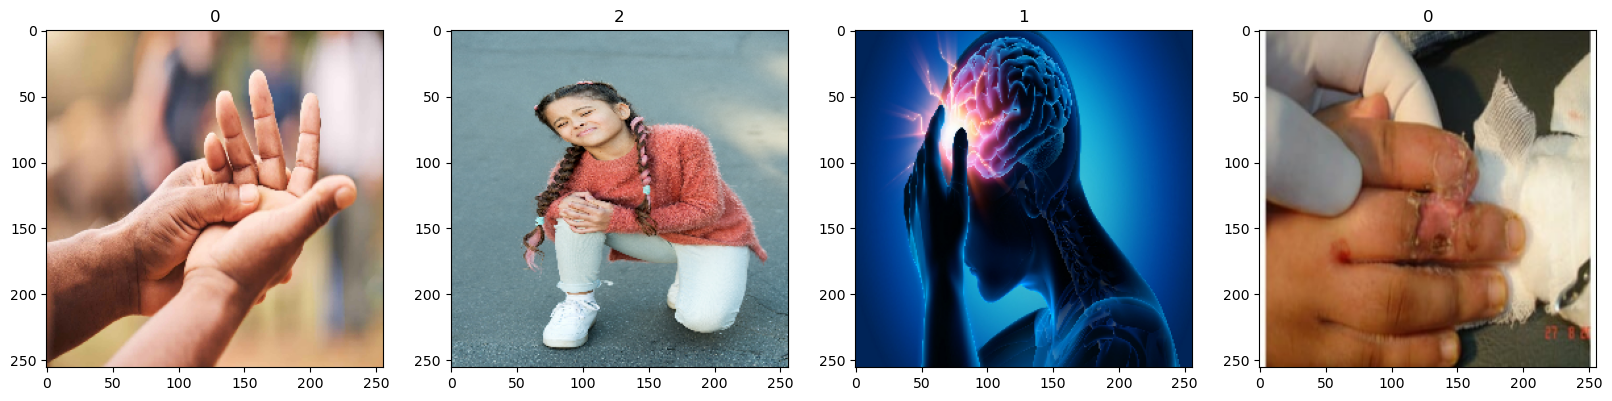

In [18]:
# plotting the image labels
# class 0 = hand injury
# class 1 = head injury
# class 2 = leg injury
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 2. Preprocessing data

## 2.1 Scaling data

In [19]:
# x - images
# y - target variable
scaled_data = dt.map(lambda x,y: (x/255, y))

In [20]:
# access the iterator and get the next batch
scaled_iterator = scaled_data.as_numpy_iterator()

In [21]:
batch = scaled_iterator.next()

In [22]:
# for inspection purposes
print(batch[0].min())
print(batch[0].max())

0.0
1.0


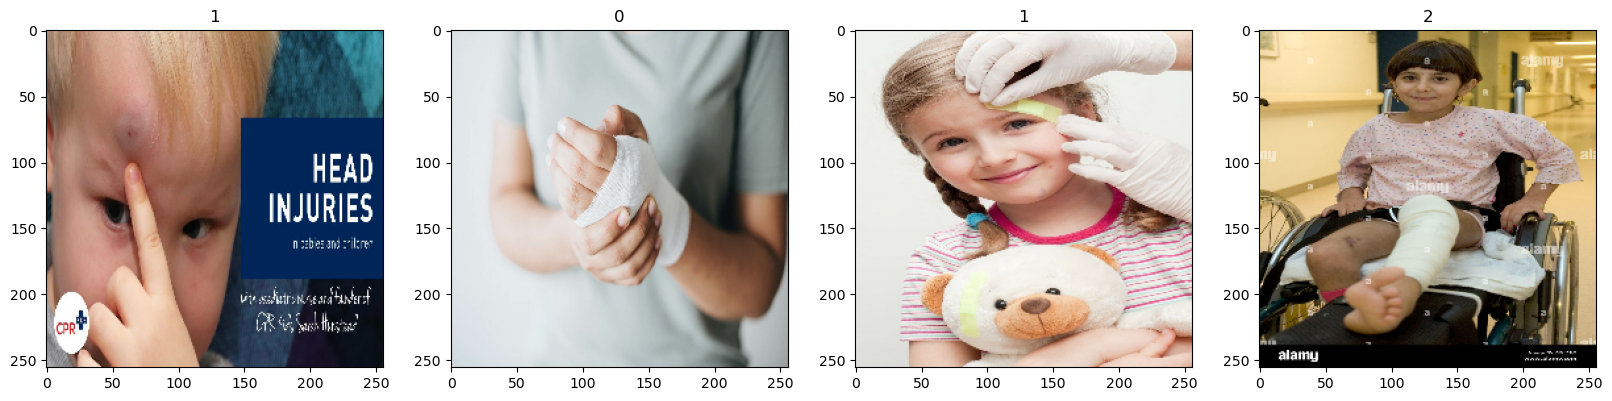

In [23]:
# removed astype(int)
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

## 2.2 Splitting data

In [24]:
# number of batches (each batch contains 32 images)
len(scaled_data)

11

In [26]:
train_set = int(len(scaled_data)*.7)
val_set = int(len(scaled_data)*.2)+1
test_set = int(len(scaled_data)*.2)+1

In [27]:
# take - how many batches are given to the sets
# skip - skip the batches that have already been given to the previous set
train = scaled_data.take(train_set)
val = scaled_data.skip(train_set).take(val_set)
test = scaled_data.skip(train_set+val_set).take(test_set)

In [28]:
# number of batches in each set
print(len(train))
print(len(val))
print(len(test))

7
3
1


# 3. Creating a Deep learning model

## 3.1 Building the model

In [29]:
# defining the model
model = Sequential()

In [30]:
# defining the architecture of CNN
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))

Convolutional layer - Conv2D

MaxPooling - reducing image data

Flatten - condencing the rows and width (making input one-dimensional)

Dense - fully-connected layer

Example: model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
* number of filters - 16
* size of the filter in pixels - (3,3)
* the stride - 1 (the model moves one pixel each time)
* activation function - relu (converting negatives values to 0 and remaining the positive)
* image size - (256,256,3) pixels and channels

Example: model.add(Dense(256, activation='relu'))
* number of neurons in the dense layer- 256
* activation function - relu

Example: model.add(Dense(3, activation='softmax'))
* number of classes in the dataset - 3
* activation function - softmax (giving each class a probability score, and the class with the highest is predicted)

In [31]:
# compiling the model
model.compile('adam', loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

optimization - Adam (dynamically adjusts the learning rates during training)

loss function - CategoricalCrossentropy (how well the predictions match the actual classes, during training the model adjusts itself to minimize loss)

In [32]:
# looking into how the model tranforms the data
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

## 3.2 Training the model

In [33]:
# creating a log directory
logs = '/Users/lisellaare/Desktop/Computer vision/ logs'

In [34]:
# creating a callback function
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5)

ReduceLROnPlateau - dynamically reducing the learning rate during training

In [35]:
# integrating with TensorBoard
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logs)

In [36]:
# containing information about the training process
model.fit(train, epochs=15, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/15
7/7 [==============================] - 4s 430ms/step - loss: 2.0429 - accuracy: 0.2991 - val_loss: 1.1005 - val_accuracy: 0.3750
Epoch 2/15
7/7 [==============================] - 4s 405ms/step - loss: 1.1003 - accuracy: 0.3125 - val_loss: 1.0911 - val_accuracy: 0.3542
Epoch 3/15
7/7 [==============================] - 4s 421ms/step - loss: 1.0930 - accuracy: 0.3527 - val_loss: 1.0858 - val_accuracy: 0.3333
Epoch 4/15
7/7 [==============================] - 4s 419ms/step - loss: 1.0847 - accuracy: 0.3973 - val_loss: 1.0767 - val_accuracy: 0.5521
Epoch 5/15
7/7 [==============================] - 4s 422ms/step - loss: 1.0703 - accuracy: 0.4509 - val_loss: 1.0464 - val_accuracy: 0.5729
Epoch 6/15
7/7 [==============================] - 4s 428ms/step - loss: 1.0254 - accuracy: 0.5804 - val_loss: 1.0205 - val_accuracy: 0.5104
Epoch 7/15
7/7 [==============================] - 4s 424ms/step - loss: 0.9871 - accuracy: 0.5625 - val_loss: 0.9309 - val_accuracy: 0.5833
Epoch 8/15
7/7 [====

## 3.3 Plotting the performance

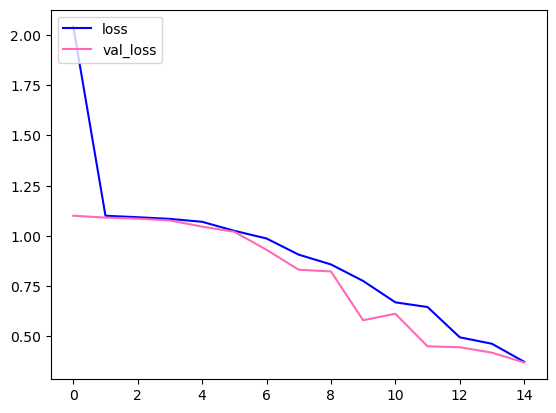

In [37]:
# plotting the training, validation loss 
plt.plot(model.history.history['loss'], color='blue', label='loss')
plt.plot(model.history.history['val_loss'], color='hotpink', label='val_loss')

fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

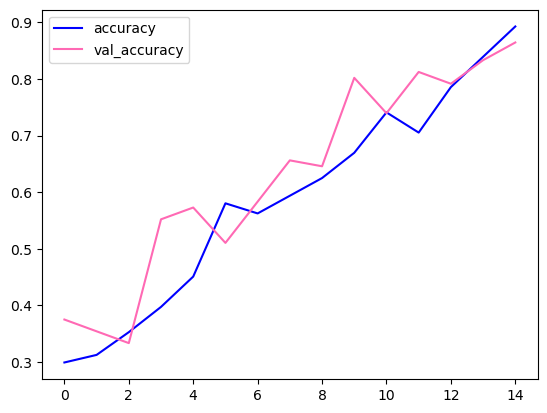

In [38]:
# plotting the training, validation accuracy
plt.plot(model.history.history['accuracy'], color='blue', label='accuracy')
plt.plot(model.history.history['val_accuracy'], color='hotpink', label='val_accuracy')

fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 4. Evaluating the performance

## 4.1 Evaluating

In [39]:
# creating instances of precision, recall, accuracy
precision = Precision()
recall = Recall()
accuracy = CategoricalAccuracy() 

In [40]:
# evaluating the model's performance on test data
# X - set of images, y - true value
# .predict - passing image data to our model
for batch in test.as_numpy_iterator(): 
    X, y_true = batch
    y_pred = model.predict(X)
    
    # one-hot encoding y_true
    y_true_one_hot = tf.one_hot(y_true, depth=3)
    
    # updating the state to see perfomance on test data
    precision.update_state(y_true_one_hot, y_pred)
    recall.update_state(y_true_one_hot, y_pred)
    accuracy.update_state(y_true_one_hot, y_pred)

1/1 [==============================] - 0s 79ms/step


In [41]:
print(f'Precision:{precision.result().numpy()}, Recall:{recall.result().numpy()}, Accuracy:{accuracy.result().numpy()}')

Precision:0.9375, Recall:0.8333333134651184, Accuracy:0.8333333134651184


## 4.2 Testing

In [42]:
# making predictions on unseen images
unseen_img = cv2.imread('/Users/lisellaare/Desktop/Computer vision/head3.jpeg')

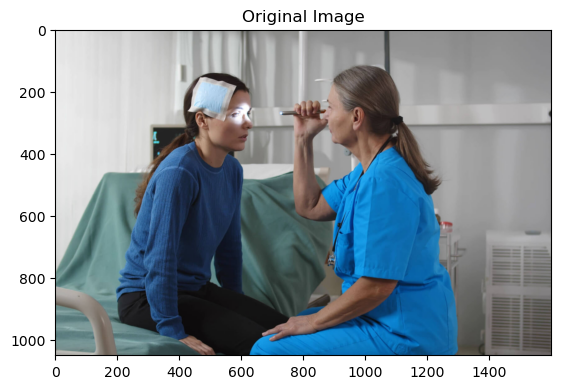

In [43]:
# displaying the original image
plt.imshow(cv2.cvtColor(unseen_img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.show()

In [44]:
# resizing
resize = tf.image.resize(tf.convert_to_tensor(unseen_img), (256, 256))
resized_img = resize.numpy().astype(int)

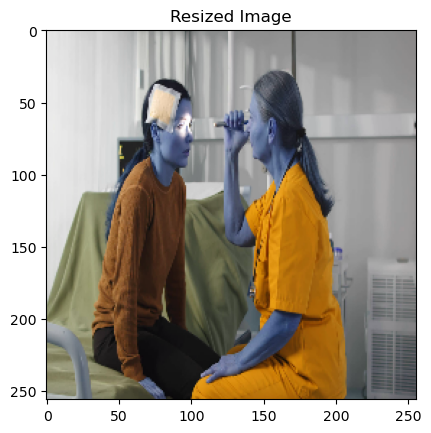

In [45]:
# displaying the resized image
plt.imshow(resized_img)
plt.title("Resized Image")
plt.show()

In [46]:
# dividing by 255 for scaling
scaled_img = resized_img / 255.0
input_img = np.expand_dims(scaled_img, 0)

In [47]:
# passing the image to our model
y_pred = model.predict(input_img)

1/1 [==============================] - 0s 10ms/step


In [48]:
y_pred

array([[0.34421176, 0.5749116 , 0.08087662]], dtype=float32)

In [52]:
# threshold for predictions
threshold = 0.5

In [53]:
if y_pred[0, 0] > threshold:
    print("Hand Injury")
elif y_pred[0, 1] > threshold:
    print("Head Injury")
elif y_pred[0, 2] > threshold:
    print("Leg Injury")
else:
    print("Uncertain")

Head Injury


# 5. Saving the model

In [54]:
# saving the model to the models folder
model.save(os.path.join('models1', 'injury_classification'))

INFO:tensorflow:Assets written to: models1/injury_classification/assets


INFO:tensorflow:Assets written to: models1/injury_classification/assets
